Checking contents of //kaggle/input/brainmriimages06:
['Training', 'Testing']
Available folders in input directory:
['pituitary', 'notumor', 'meningioma', 'glioma']
Processed Tr-pi_0532.jpg with median filter
Processed Tr-pi_0282.jpg with median filter
Processed Tr-pi_1401.jpg with median filter
Processed Tr-pi_0914.jpg with median filter
Processed Tr-pi_0691.jpg with median filter
Processed Tr-pi_0972.jpg with median filter
Processed Tr-pi_0818.jpg with median filter
Processed Tr-pi_0463.jpg with median filter
Processed Tr-pi_0930.jpg with median filter
Processed Tr-pi_1323.jpg with median filter
Processed Tr-pi_1347.jpg with median filter
Processed Tr-pi_1354.jpg with median filter
Processed Tr-pi_0704.jpg with median filter
Processed Tr-pi_0789.jpg with median filter
Processed Tr-pi_1445.jpg with median filter
Processed Tr-pi_0605.jpg with median filter
Processed Tr-pi_0882.jpg with median filter
Processed Tr-pi_1274.jpg with median filter
Processed Tr-pi_0339.jpg with median filter

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733133349.728776     112 service.cc:145] XLA service 0x7e54bc0038b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733133349.728837     112 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733133349.728842     112 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/179 ━━━━━━━━━━━━━━━━━━━━ 1:00:39 20s/step - accuracy: 0.3750 - loss: 2.1372

I0000 00:00:1733133364.949517     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 486ms/step - accuracy: 0.6275 - loss: 1.0716 - val_accuracy: 0.8063 - val_loss: 0.5139
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 355ms/step - accuracy: 0.8063 - loss: 0.5404 - val_accuracy: 0.8452 - val_loss: 0.4493
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 359ms/step - accuracy: 0.8287 - loss: 0.4781 - val_accuracy: 0.8589 - val_loss: 0.4438
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 356ms/step - accuracy: 0.8570 - loss: 0.3811 - val_accuracy: 0.8993 - val_loss: 0.3055
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 356ms/step - accuracy: 0.8633 - loss: 0.3760 - val_accuracy: 0.8780 - val_loss: 0.3586
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 355ms/step - accuracy: 0.8624 - loss: 0.3639 - val_accuracy: 0.8886 - val_loss: 0.2977
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 358ms/step - accuracy: 0.8921 - loss: 0.3072 - val_accuracy: 0.9001 - val_loss: 0.2886
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 357ms/step - accuracy: 0.8884 - loss: 0.3132 - va

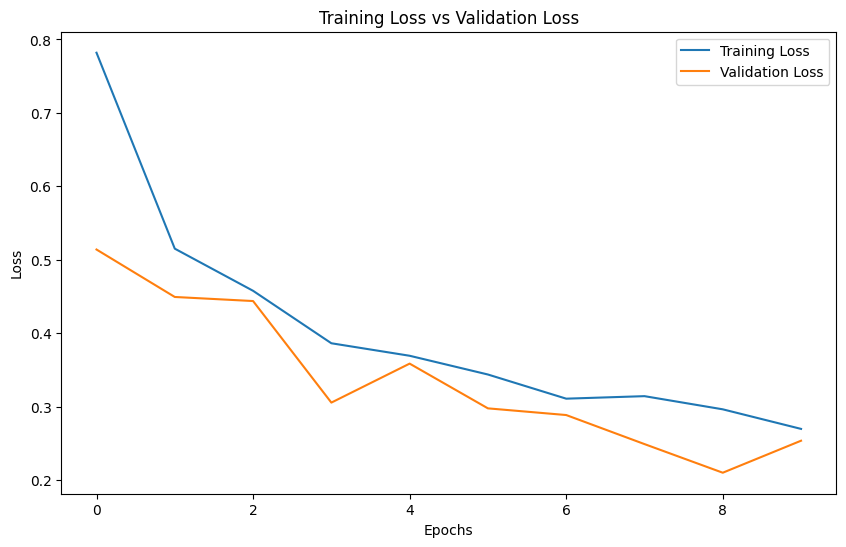

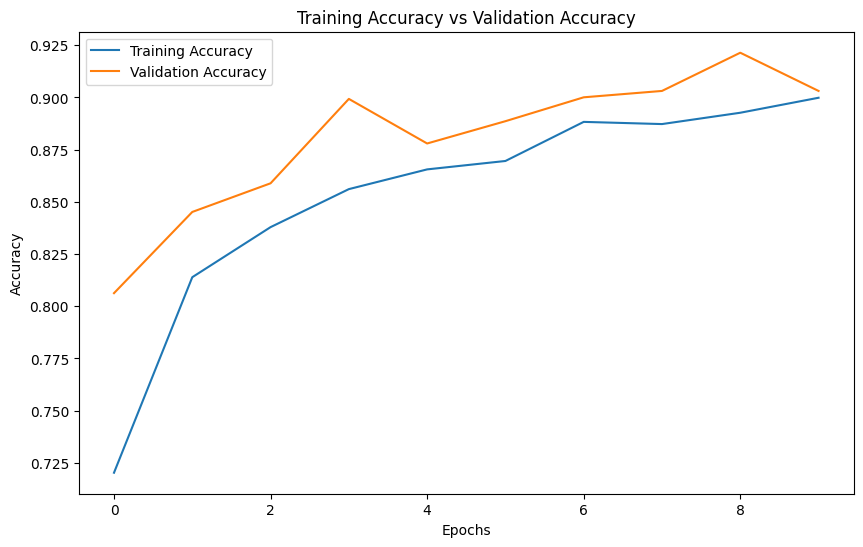

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step


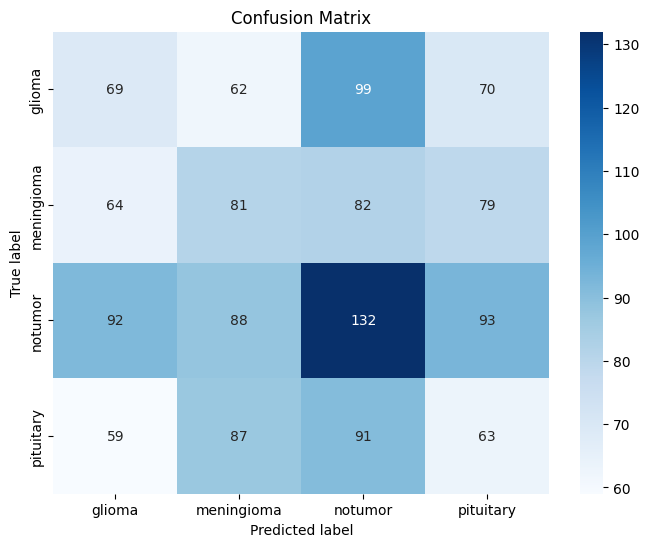

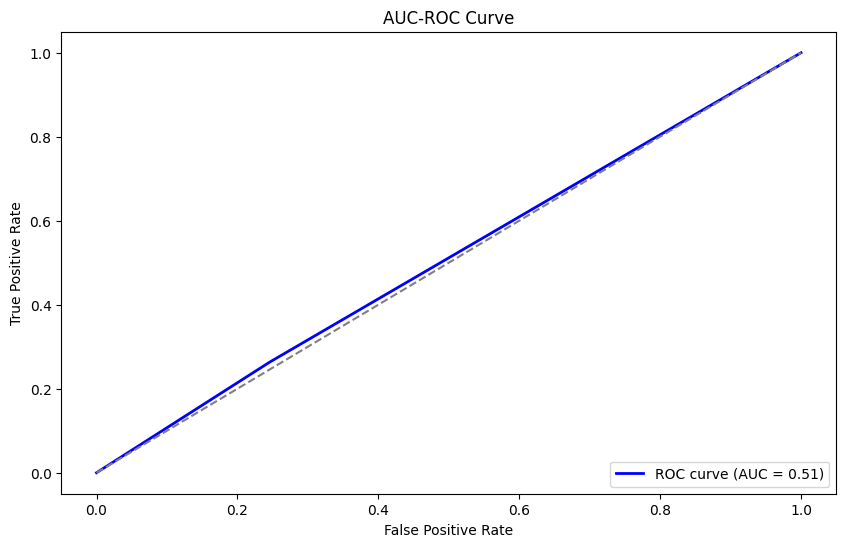

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Step 2: Apply Median Filter for image enhancement
def apply_median_filter_to_images(input_dir, output_dir, filter_size=3):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Available folders in input directory:")
    print(os.listdir(input_dir))

    for class_name in os.listdir(input_dir):
        class_folder = os.path.join(input_dir, class_name)

        if not os.path.isdir(class_folder):
            continue

        class_output_folder = os.path.join(output_dir, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            image = cv2.imread(image_path)
            filtered_image = cv2.medianBlur(image, filter_size)

            output_image_path = os.path.join(class_output_folder, image_name)
            cv2.imwrite(output_image_path, filtered_image)
            print(f"Processed {image_name} with median filter")

# Define paths
dataset_path = '//kaggle/input/brainmriimages06'
training_input_dir = os.path.join(dataset_path, 'Training')
testing_input_dir = os.path.join(dataset_path, 'Testing')

print(f"Checking contents of {dataset_path}:")
print(os.listdir(dataset_path))

training_output_dir = '/kaggle/working/Training_filtered'
testing_output_dir = '/kaggle/working/Testing_filtered'

apply_median_filter_to_images(training_input_dir, training_output_dir)
apply_median_filter_to_images(testing_input_dir, testing_output_dir)

# Step 3: Prepare data generators for training and testing
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    directory=training_output_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    directory=testing_output_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Step 4: Load the VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Build the complete model with a custom classifier
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model (only the custom layers)
epochs = 10
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

# Unfreeze some layers in VGG16 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 5
history_fine_tune = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=fine_tune_epochs
)

# Step 7: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("brain_tumor_classifier_vgg16_finetuned.h5")

# Step 8: Plot Training Loss vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Plot Training Accuracy vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 10: Generate Confusion Matrix
# Get predictions on the test data
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to one-hot encoding and true labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 11: AUC-ROC curve
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)
y_pred_bin = lb.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
